In [3]:
import pickle
import pandas as pd
import numpy as np

In [4]:
data = r'C:\Users\karol\old_pickles\rssFeedGuard.pickle' 
#tele153/2
#guard 1559
df = pd.read_pickle(data)
df.head()

,published,title,summary
0,"Fri, 05 May 2023 08:37:57 GMT",Local elections 2023: ‘disappointing’ night fo...,<p>Labour gains Plymouth and Stoke-on-Trent wi...
1,"Fri, 05 May 2023 08:42:18 GMT",Russia-Ukraine war live: no ‘self-respecting c...,<p>Russian foreign minister reiterates Kremlin...
2,"Fri, 05 May 2023 08:37:41 GMT",Serbia: man arrested after eight die in second...,<p>Arrest follows hunt for shooter who fired a...
3,"Fri, 05 May 2023 08:40:35 GMT",Pound hits 11-month high against dollar amid U...,<p>Rolling coverage of the latest economic and...
4,"Fri, 05 May 2023 08:29:35 GMT",Local elections 2023: ‘disappointing’ night fo...,<p>Labour gains Plymouth and Stoke-on-Trent wi...


In [22]:
#remove days with little data

#we only have good data from 28.04-.04.05
#drop other entrys
#convert to date time
from datetime import datetime
# # default format - "%a %b %d %H:%M:%S %Y"
# time_str_default = 'Mon Dec 12 14:55:02 2022'
# time_obj_default = time.strptime(time_str_default)


#date_str = "Fri, 05 May 2023 08:37:57 GMT"
date_format = "%a, %d %b %Y %H:%M:%S %Z"
date_time_obj = datetime.strptime(date_str, date_format)

print("Date Time Object:", date_time_obj)

df['dateTime'] = df['published'].apply(lambda x: datetime.strptime(x,date_format))
# Filter the dataframe to keep only rows where the date is between 28 April 2023 and 04 May 2023 (inclusive)
start_date = pd.to_datetime('28 April 2023', format="%d %B %Y")
end_date = pd.to_datetime('04 May 2023', format="%d %B %Y")
df = df.loc[(df['dateTime'] >= start_date) & (df['dateTime'] <= end_date)]


Date Time Object: 2023-05-05 08:37:57


In [3]:
print(df.values[:2])

[['Fri, 05 May 2023 08:37:57 GMT'
  'Local elections 2023: ‘disappointing’ night for Tories as Labour makes big gains in key England councils – live'
  '<p>Labour gains Plymouth and Stoke-on-Trent with results still coming in for 230 councils in England, plus four mayoral races</p><ul><li><a href="https://www.theguardian.com/politics/ng-interactive/2023/may/04/elections-2023-results-live-local-council-england">Live results tracker</a></li></ul><p><strong>Prof Rob Ford,</strong> an elections specialist, has written an article for the Guardian trying to assess what would be a good result and a bad result for the political parties in the local election. You can read it here:</p><p>Results from more than 60 councils are expected overnight with the remainder expected to trickle in throughout the day on Friday.</p> <a href="https://www.theguardian.com/politics/live/2023/may/04/local-elections-2023-latest-results-reactions-polls-close-england-conservatives-labour-rishi-sunak-keir-starmer-lib-

In [23]:
import bleach
s ='<p>Russian foreign minister reiterates Kremlin claim that Moscow drone incident was a ‘terrorist attack’</p><p><a href="https://www.theguardian.com/world/2023/may/05/russia-ukraine-war-at-a-glance-what-we-know-on-day-436-of-the-invasion">What we know on day 436 of the invasion</a></p><p><strong>The UK Ministry of Defence</strong> has said in its latest intelligence update that “a recent uptick in Russian rail accidents in areas bordering Ukraine, attributed to sabotage committed by unknown actors, has almost certainly caused short-term localised disruption to Russian military rail movements”.</p><p>It adds: “Although its Railway Troop Brigades are capable of restoring lines quickly, these incidents will increase pressure on Russia’s internal security forces, who will highly likely remain unable to fully protect Russia’s vast and vulnerable rail networks from attack.”</p> <a href="https://www.theguardian.com/world/live/2023/may/05/russia-ukraine-war-live-kyiv-shoots-down-own-drone-over-capital-zelenskiy-speaks-at-the-hague">Continue reading...</a>'
clean = bleach.clean(s,tags = [],strip=True)
print(clean)

Russian foreign minister reiterates Kremlin claim that Moscow drone incident was a ‘terrorist attack’
What we know on day 436 of the invasion
The UK Ministry of Defence has said in its latest intelligence update that “a recent uptick in Russian rail accidents in areas bordering Ukraine, attributed to sabotage committed by unknown actors, has almost certainly caused short-term localised disruption to Russian military rail movements”.
It adds: “Although its Railway Troop Brigades are capable of restoring lines quickly, these incidents will increase pressure on Russia’s internal security forces, who will highly likely remain unable to fully protect Russia’s vast and vulnerable rail networks from attack.” Continue reading...


In [24]:
#this will work but we can use lambda
# def bleachFunction(x):
#     return bleach.clean(x,tags = [],strip=True)


#df['sumClean'] = df['summary'].map(bleachFunction)

#try with lambda

df['sumClean'] = df['summary'].map(lambda x: bleach.clean(x,tags = [],strip=True))
#remove trailing new lines\n
df['sumClean'] = df['sumClean'].map(lambda x: x.replace("\n", " "))

#remove Continue reading...
df['sumClean'] = df['sumClean'].map(lambda x: x.replace("Continue reading...", ""))
#remove  You can read it here:
df['sumClean'] = df['sumClean'].map(lambda x: x.replace("You can read it here:", ""))

df.head()

,published,title,summary,dateTime,sumClean,subjectivityT,polarityT,flairSentimentTitle,publishedDate,flairSentimentSummary
228,"Wed, 03 May 2023 23:00:33 GMT",Commonwealth Indigenous leaders demand apology from the king for effects of colonisation,"<p><strong>Exclusive:</strong> Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’</p><ul><li><a href=""https://www.theguardian.com/australia-news/live/2023/may/04/australia-news-live-federal-budget-aged-care-cost-of-living-interest-rates-indigenous-voice-albanese"">Follow our Australia news live blog for the latest updates</a></li><li>Get our <a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=cvau_sfl"">morning and afternoon news emails</a>, <a href=""https://app.adjust.com/w4u7jx3"">free app</a> or <a href=""https://www.theguardian.com/australia-news/series/full-story?CMP=cvau_sfl"">daily news podcast</a></li></ul><p>Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains.</p><p>Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”.</p><p><strong><a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=copyembed"">Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup</a></strong></p> <a href=""https://www.theguardian.com/uk-news/2023/may/04/commonwealth-indigenous-leaders-demand-apology-from-the-king-for-effects-of-colonisation"">Continue reading...</a>",2023-05-03 23:00:33,"Exclusive: Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’ Follow our Australia news live blog for the latest updates Get our morning and afternoon news emails, free app or daily news podcast Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains. Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”. Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup",0.000000,0.00,"(NEGATIVE, 0.9953197836875916)","Wed, 03 May 2023","(NEGATIVE, 0.655056357383728)"
248,"Wed, 03 May 2023 18:37:57 GMT",Rishi Sunak sends MPs away with a flurry of fibs at PMQs,"<p>MPs vanish as Rish! turns PMQs into excruciating session of prime minister’s evasions</p><p>Call it coronation fever. An inexplicable urge to dash home and cover everything with red, white and blue bunting. Call it local elections fever. That time of the year when politicians head for their constituencies to declare the council to either be the best or the worst in the country.</p><p>Or maybe it’s just that the reputation of prime minister’s questions now precedes it. The last few PMQs have been excruciating for all concerned. Whatever the reason, the <a href=""https://www.theguardian.com/politics/2023/may/03/starmer-accuses-rishi-sunak-of-killing-the-dream-of-home-ownership#:~:text=K

In [25]:
#some data is duplicated
#remove duplicates based on title?
#are these updates to a topic, for example, local elections?
df = df.drop_duplicates(keep="first")

In [26]:
# import sys
# !{sys.executable} -m pip install textblob

In [27]:
from textblob import TextBlob
#get sentiment

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
df['subjectivityT'] =df['title'].apply(getSubjectivity)
df['polarityT'] = df['title'].apply(getPolarity)


In [28]:
df.head(20)

,published,title,summary,dateTime,sumClean,subjectivityT,polarityT,flairSentimentTitle,publishedDate,flairSentimentSummary
228,"Wed, 03 May 2023 23:00:33 GMT",Commonwealth Indigenous leaders demand apology from the king for effects of colonisation,"<p><strong>Exclusive:</strong> Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’</p><ul><li><a href=""https://www.theguardian.com/australia-news/live/2023/may/04/australia-news-live-federal-budget-aged-care-cost-of-living-interest-rates-indigenous-voice-albanese"">Follow our Australia news live blog for the latest updates</a></li><li>Get our <a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=cvau_sfl"">morning and afternoon news emails</a>, <a href=""https://app.adjust.com/w4u7jx3"">free app</a> or <a href=""https://www.theguardian.com/australia-news/series/full-story?CMP=cvau_sfl"">daily news podcast</a></li></ul><p>Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains.</p><p>Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”.</p><p><strong><a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=copyembed"">Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup</a></strong></p> <a href=""https://www.theguardian.com/uk-news/2023/may/04/commonwealth-indigenous-leaders-demand-apology-from-the-king-for-effects-of-colonisation"">Continue reading...</a>",2023-05-03 23:00:33,"Exclusive: Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’ Follow our Australia news live blog for the latest updates Get our morning and afternoon news emails, free app or daily news podcast Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains. Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”. Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup",0.000000,0.000000,"(NEGATIVE, 0.9953197836875916)","Wed, 03 May 2023","(NEGATIVE, 0.655056357383728)"
248,"Wed, 03 May 2023 18:37:57 GMT",Rishi Sunak sends MPs away with a flurry of fibs at PMQs,"<p>MPs vanish as Rish! turns PMQs into excruciating session of prime minister’s evasions</p><p>Call it coronation fever. An inexplicable urge to dash home and cover everything with red, white and blue bunting. Call it local elections fever. That time of the year when politicians head for their constituencies to declare the council to either be the best or the worst in the country.</p><p>Or maybe it’s just that the reputation of prime minister’s questions now precedes it. The last few PMQs have been excruciating for all concerned. Whatever the reason, the <a href=""https://www.theguardian.com/politics/2023/may/03/starmer-accuses-rishi-sunak-of-killing-the-dream-of-home-ownership#:~:te

Embedding based python packages use this form of text representation to predict text sentiments. This leads to better text representation in NLP and yields better model performance.

One of such packages is Flair.    



In [29]:
# import sys
# !{sys.executable} -m pip install --user flair


In [30]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('The food was great!')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

Sentence above is:  ['Sentence[5]: "The food was great!"'/'POSITIVE' (0.9961)]


In [31]:
def text_sentiment_flair(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    sent = sentence.labels[0].value
    conf =sentence.labels[0].score
    return sent, conf
    #return np.round(sentence.labels[0].score)
print(text_sentiment_flair("Former US president said Putin disavowed Yeltsin deal over Ukraine; Ukrainian air force downed own drone after it lost control over Kyiv  What we know on day 436 of the invasion The UK Ministry of Defence has said in its latest intelligence update that “a recent uptick in Russian rail accidents in areas bordering Ukraine, attributed to sabotage committed by unknown actors, has almost certainly caused short-term localised disruption to Russian military rail movements”. It adds: “Although its Railway Troop Brigades are capable of restoring lines quickly, these incidents will increase pressure on Russia’s internal security forces, who will highly likely remain unable to fully protect Russia’s vast and vulnerable rail networks from attack.” "))
#sentiment for title
df['flairSentimentTitle'] = df.title.map(lambda x : text_sentiment_flair(x))
#sentiment for summary
#df['flairSentimentSummary'] = df.sumClean.map(lambda x : text_sentiment_flair(x))

# sentence.labels[0].to_dict()['value']
# '1'

# sentence.labels[0].to_dict()['confidence']

('NEGATIVE', 0.9990642666816711)


In [43]:
df.head()

,published,title,summary,dateTime,sumClean,subjectivityT,polarityT,flairSentimentTitle,publishedDate,flairSentimentSummary
228,"Wed, 03 May 2023 23:00:33 GMT",Commonwealth Indigenous leaders demand apology from the king for effects of colonisation,"<p><strong>Exclusive:</strong> Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’</p><ul><li><a href=""https://www.theguardian.com/australia-news/live/2023/may/04/australia-news-live-federal-budget-aged-care-cost-of-living-interest-rates-indigenous-voice-albanese"">Follow our Australia news live blog for the latest updates</a></li><li>Get our <a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=cvau_sfl"">morning and afternoon news emails</a>, <a href=""https://app.adjust.com/w4u7jx3"">free app</a> or <a href=""https://www.theguardian.com/australia-news/series/full-story?CMP=cvau_sfl"">daily news podcast</a></li></ul><p>Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains.</p><p>Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”.</p><p><strong><a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=copyembed"">Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup</a></strong></p> <a href=""https://www.theguardian.com/uk-news/2023/may/04/commonwealth-indigenous-leaders-demand-apology-from-the-king-for-effects-of-colonisation"">Continue reading...</a>",2023-05-03 23:00:33,"Exclusive: Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’ Follow our Australia news live blog for the latest updates Get our morning and afternoon news emails, free app or daily news podcast Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains. Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”. Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup",0.000000,0.00,"(NEGATIVE, 0.9953197836875916)","Wed, 03 May 2023","(NEGATIVE, 0.655056357383728)"
248,"Wed, 03 May 2023 18:37:57 GMT",Rishi Sunak sends MPs away with a flurry of fibs at PMQs,"<p>MPs vanish as Rish! turns PMQs into excruciating session of prime minister’s evasions</p><p>Call it coronation fever. An inexplicable urge to dash home and cover everything with red, white and blue bunting. Call it local elections fever. That time of the year when politicians head for their constituencies to declare the council to either be the best or the worst in the country.</p><p>Or maybe it’s just that the reputation of prime minister’s questions now precedes it. The last few PMQs have been excruciating for all concerned. Whatever the reason, the <a href=""https://www.theguardian.com/politics/2023/may/03/starmer-accuses-rishi-sunak-of-killing-the-dream-of-home-ownership#:~:text=K

In [33]:
#select only published date
df['publishedDate'] = df.published.map(lambda x : x[:16])
#df.published.map(lambda x : x[:15])

In [42]:
pd.set_option('display.max_colwidth', None)
df["sumClean"].head(30)

228                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Exclusive: Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’  Follow our Australia news live blog for the latest updates Get our m

In [37]:
print(np.where(pd.isnull(df))) #are there any nans? no
print(np.where(df.applymap(lambda x: x == ''))) #but we have empty strings
cartoonRow = np.where(df.applymap(lambda x: x == ''))[0]
print(cartoonRow)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
[]


In [86]:
#print(df.iloc[62, ]) #Steve Bell on protests at King Charles III’s coronation – cartoon
#print(df.iloc[240, ]) cartoons
#print(df.iloc[487, ]) cartoons 
#df.drop(index = [62,  240,  487, 1020, 1039, 1061, 1241])
# df = df.drop(df.index[[62,  240,  487, 1020, 1039, 1061, 1241]])
# print(np.where(df.applymap(lambda x: x == '')))

In [44]:
df['flairSentimentSummary'] = df.sumClean.map(lambda x : text_sentiment_flair(x))#takes a long time


,published,title,summary,dateTime,sumClean,subjectivityT,polarityT,flairSentimentTitle,publishedDate,flairSentimentSummary
228,"Wed, 03 May 2023 23:00:33 GMT",Commonwealth Indigenous leaders demand apology from the king for effects of colonisation,"<p><strong>Exclusive:</strong> Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’</p><ul><li><a href=""https://www.theguardian.com/australia-news/live/2023/may/04/australia-news-live-federal-budget-aged-care-cost-of-living-interest-rates-indigenous-voice-albanese"">Follow our Australia news live blog for the latest updates</a></li><li>Get our <a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=cvau_sfl"">morning and afternoon news emails</a>, <a href=""https://app.adjust.com/w4u7jx3"">free app</a> or <a href=""https://www.theguardian.com/australia-news/series/full-story?CMP=cvau_sfl"">daily news podcast</a></li></ul><p>Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains.</p><p>Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”.</p><p><strong><a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=copyembed"">Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup</a></strong></p> <a href=""https://www.theguardian.com/uk-news/2023/may/04/commonwealth-indigenous-leaders-demand-apology-from-the-king-for-effects-of-colonisation"">Continue reading...</a>",2023-05-03 23:00:33,"Exclusive: Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’ Follow our Australia news live blog for the latest updates Get our morning and afternoon news emails, free app or daily news podcast Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains. Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”. Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup",0.000000,0.000000,"(NEGATIVE, 0.9953197836875916)","Wed, 03 May 2023","(NEGATIVE, 0.655056357383728)"
248,"Wed, 03 May 2023 18:37:57 GMT",Rishi Sunak sends MPs away with a flurry of fibs at PMQs,"<p>MPs vanish as Rish! turns PMQs into excruciating session of prime minister’s evasions</p><p>Call it coronation fever. An inexplicable urge to dash home and cover everything with red, white and blue bunting. Call it local elections fever. That time of the year when politicians head for their constituencies to declare the council to either be the best or the worst in the country.</p><p>Or maybe it’s just that the reputation of prime minister’s questions now precedes it. The last few PMQs have been excruciating for all concerned. Whatever the reason, the <a href=""https://www.theguardian.com/politics/2023/may/03/starmer-accuses-rishi-sunak-of-killing-the-dream-of-home-ownership#:~:te

In [39]:
dfCountDates = df.groupby(['publishedDate'])['publishedDate'].count()
print(dfCountDates)

publishedDate
Fri, 28 Apr 2023    240
Mon, 01 May 2023    116
Sat, 29 Apr 2023    184
Sun, 30 Apr 2023     90
Tue, 02 May 2023    204
Wed, 03 May 2023    187
Name: publishedDate, dtype: int64


In [71]:
#group by date
# Group Rows into List on All columns
#drop summary column
dfDate = df.drop('summary', axis=1)
dfDate = dfDate.groupby("publishedDate",as_index=False).agg(list)


In [72]:
dfDate.head()

publishedDate  \
0  Fri, 28 Apr 2023   
1  Mon, 01 May 2023   
2  Sat, 29 Apr 2023   
3  Sun, 30 Apr 2023   
4  Tue, 02 May 2023   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           published  \
0  [Fri, 28 Apr 2023 22:06:56 GMT, Fri, 28 Apr 2023 21:18:52 GMT, Fri, 28 Apr 2023 21:32:11 GMT, Fri, 28 Apr 2023 21:34:22 GMT, Fri, 28 Apr 2023 21:10:15 GMT, Fri, 28 Apr 2023 21:00:17 GMT, Fri, 28 Apr 2023 18:32:32 GMT, Fri, 28 Apr 2023 18:03:47 GMT, Fri, 28 Apr 2023 19:00:15 GMT, Fri, 28 Apr 2023 20:00:16 GMT, Fri, 28 Apr 2023 19:00:14 GMT, Fri, 28 Apr 2023 20:34:09 GMT, Fri, 28 Apr 2023 19:34:26 GMT, Fri, 28 Apr 2023 18:32:44 GMT, Fri, 28 Apr 2023 20:49:31 GMT, Fri, 28 Apr 2023 20:27:02 GMT, Fri, 28 Apr 2023 20:00:16 GMT, Fri, 28 Apr 2023 19:35:53 GMT, Fri, 28 Apr 2023 18:00:36 GMT, Fri, 28 Apr 2023 17:56:45 GMT, Fri, 28 Apr 2023 17:30:13 GMT, Fri, 28 Apr 2023 17:25:12 GMT, Fri, 28 Apr 2023 17:01:58 GMT, Fri, 28 Apr 2023 15:16:44 GMT, Fri, 28

In [45]:
#to do 
#adddots after forst sentence
#delete sign up for
#graph sentiment
#10 most frequent nouns and verbs
#countrys
#1sentiment per day
df.head(20)

,published,title,summary,dateTime,sumClean,subjectivityT,polarityT,flairSentimentTitle,publishedDate,flairSentimentSummary
228,"Wed, 03 May 2023 23:00:33 GMT",Commonwealth Indigenous leaders demand apology from the king for effects of colonisation,"<p><strong>Exclusive:</strong> Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’</p><ul><li><a href=""https://www.theguardian.com/australia-news/live/2023/may/04/australia-news-live-federal-budget-aged-care-cost-of-living-interest-rates-indigenous-voice-albanese"">Follow our Australia news live blog for the latest updates</a></li><li>Get our <a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=cvau_sfl"">morning and afternoon news emails</a>, <a href=""https://app.adjust.com/w4u7jx3"">free app</a> or <a href=""https://www.theguardian.com/australia-news/series/full-story?CMP=cvau_sfl"">daily news podcast</a></li></ul><p>Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains.</p><p>Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”.</p><p><strong><a href=""https://www.theguardian.com/australia-news/2022/oct/29/email-newsletters-guardian-australia-best-daily-news-emails-newsletter-free-sign-up-inbox-subscribe-headlines?CMP=copyembed"">Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup</a></strong></p> <a href=""https://www.theguardian.com/uk-news/2023/may/04/commonwealth-indigenous-leaders-demand-apology-from-the-king-for-effects-of-colonisation"">Continue reading...</a>",2023-05-03 23:00:33,"Exclusive: Aboriginal Olympian Nova Peris says ‘change begins with listening’ as campaigners from 12 countries ask for ‘process of reparatory justice to commence’ Follow our Australia news live blog for the latest updates Get our morning and afternoon news emails, free app or daily news podcast Australians have joined Indigenous leaders and politicians across the Commonwealth to demand King Charles III make a formal apology for the effects of British colonisation, make reparations by redistributing the wealth of the British crown, and return artefacts and human remains. Days out from Charles’s coronation in London, campaigners for republic and reparations movements in 12 countries have written a letter asking the new monarch to start a process towards “a formal apology and for a process of reparatory justice to commence”. Sign up for Guardian Australia’s free morning and afternoon email newsletters for your daily news roundup",0.000000,0.000000,"(NEGATIVE, 0.9953197836875916)","Wed, 03 May 2023","(NEGATIVE, 0.655056357383728)"
248,"Wed, 03 May 2023 18:37:57 GMT",Rishi Sunak sends MPs away with a flurry of fibs at PMQs,"<p>MPs vanish as Rish! turns PMQs into excruciating session of prime minister’s evasions</p><p>Call it coronation fever. An inexplicable urge to dash home and cover everything with red, white and blue bunting. Call it local elections fever. That time of the year when politicians head for their constituencies to declare the council to either be the best or the worst in the country.</p><p>Or maybe it’s just that the reputation of prime minister’s questions now precedes it. The last few PMQs have been excruciating for all concerned. Whatever the reason, the <a href=""https://www.theguardian.com/politics/2023/may/03/starmer-accuses-rishi-sunak-of-killing-the-dream-of-home-ownership#:~:te

In [73]:
#figure out the structure
print(type(dfDate.loc[:, 'flairSentimentTitle'].iloc[0]))
print(type((dfDate.loc[:, 'flairSentimentTitle'].iloc[0])[0]))
print((dfDate.loc[:, 'flairSentimentTitle'].iloc[0])[0])

dfDate['posSummary'] = [sum(1 for sentiment, score in lst if sentiment == 'POSITIVE') for lst in dfDate['flairSentimentSummary']]
dfDate['negSummary'] = [sum(1 for sentiment, score in lst if sentiment == 'NEGATIVE') for lst in dfDate['flairSentimentSummary']]

<class 'list'>
<class 'tuple'>
('POSITIVE', 0.9997772574424744)


In [74]:
#count positive in string 
#not ideal in terms of assessment 
#profiting from slavery unis judged as positive
#chatgpt does better

#get percentage
dfDate['posSummaryPer'] = (dfDate['posSummary']/(dfDate['posSummary']+dfDate['negSummary']))*100
dfDate['negSummaryPer'] = (dfDate['negSummary']/(dfDate['posSummary']+dfDate['negSummary']))*100



In [75]:
dfDate.head(2)

publishedDate  \
0  Fri, 28 Apr 2023   
1  Mon, 01 May 2023   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           published  \
0  [Fri, 28 Apr 2023 22:06:56 GMT, Fri, 28 Apr 2023 21:18:52 GMT, Fri, 28 Apr 2023 21:32:11 GMT, Fri, 28 Apr 2023 21:34:22 GMT, Fri, 28 Apr 2023 21:10:15 GMT, Fri, 28 Apr 2023 21:00:17 GMT, Fri, 28 Apr 2023 18:32:32 GMT, Fri, 28 Apr 2023 18:03:47 GMT, Fri, 28 Apr 2023 19:00:15 GMT, Fri, 28 Apr 2023 20:00:16 GMT, Fri, 28 Apr 2023 19:00:14 GMT, Fri, 28 Apr 2023 20:34:09 GMT, Fri, 28 Apr 2023 19:34:26 GMT, Fri, 28 Apr 2023 18:32:44 GMT, Fri, 28 Apr 2023 20:49:31 GMT, Fri, 28 Apr 2023 20:27:02 GMT, Fri, 28 Apr 2023 20:00:16 GMT, Fri, 28 Apr 2023 19:35:53 GMT, Fri, 28 Apr 2023 18:00:36 GMT, Fri, 28 Apr 2023 17:56:45 GMT, Fri, 28 Apr 2023 17:30:13 GMT, Fri, 28 Apr 2023 17:25:12 GMT, Fri, 28 Apr 2023 17:01:58 GMT, Fri, 28 Apr 2023 15:16:44 GMT, Fri, 28 Apr 2023 16:40:22 GMT, Fri, 28 Apr 2023 16:04:59 GMT, Fri, 28 Apr 20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


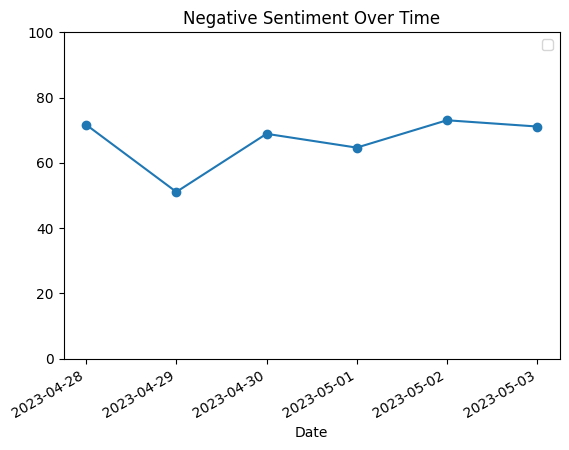

In [85]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and contains columns 'date', 'data1', and 'data2'

# Convert the 'date' column to datetime if it's not already
dfDate['publishedDateDateTime'] = pd.to_datetime(dfDate['publishedDate'])
#dfDate.head(2)
# Sort the dataframe by date in ascending order
dfDate = dfDate.sort_values('publishedDateDateTime')

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the data lines
#ax.plot(dfDate['publishedDateDateTime'], dfDate['posSummaryPer'], label='Positive sentiment')
ax.plot(dfDate['publishedDateDateTime'], dfDate['negSummaryPer'], marker='o')#, label='Negative sentiment'

# Customize the plot
ax.set_xlabel('Date')
#ax.set_ylabel('Negative Sentiment')
ax.set_title('Negative Sentiment Over Time')
ax.legend()

# Format the x-axis tick labels as dates
plt.gcf().autofmt_xdate()

# Set the y-axis limits from 0 to 100%
ax.set_ylim(0, 100)

# Show the plot
plt.show()

In [ ]:
#Actually, I want to show tope negative headings rather than below words, but it's useful to know how to get neg words, can't do this with Flair as it relies on embeddings

In [104]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Instantiate the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sample text
text = "I'm feeling really disappointed and frustrated with the war and conflict and molested people situation."

# Analyze sentiment using VADER
sentiment_scores = sid.polarity_scores(text)

# Extract negative words based on sentiment scores
negative_words = [word for word in text.split() if sid.polarity_scores(word)['neg'] > 0.9]
#only choose super negative words, choose top 10 and score polarity

print(negative_words)

['disappointed', 'frustrated', 'war', 'conflict', 'molested']


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#select top bad words